# NetworkXライブラリを使った検証

In [1]:
# 必要パッケージのインポートと不思議なおまじない

import matplotlib.pyplot as plt
import numpy as np
# np.random.seed(0)
import sklearn as sl
import pandas as pd
import seaborn as sns
import scipy as sp
import gensim
import networkx as nx

%matplotlib inline

## グラフデータの作成

In [2]:
g = nx.DiGraph()
g.add_nodes_from([1, 2, 3])
g.add_edges_from([(1, 2), (1, 3), (2, 1), (3, 2)])

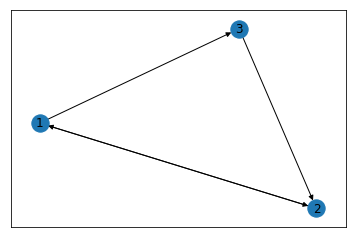

In [3]:
nx.draw_networkx(g)

## PageRank

### ランダムジャンプしない場合

In [4]:
nx.google_matrix(g, alpha=1.0)

matrix([[0. , 0.5, 0.5],
        [1. , 0. , 0. ],
        [0. , 1. , 0. ]])

ランダムウォークに対応する行列とランダムジャンプに対応する行列（今はゼロ行列）を足したもの

In [5]:
nx.pagerank(g, alpha=1.0)

{1: 0.400000254313151, 2: 0.400000254313151, 3: 0.1999994913736979}

### 通常の比率（0.15）でランダムジャンプする場合

In [6]:
nx.google_matrix(g, alpha=0.85)

matrix([[0.05 , 0.475, 0.475],
        [0.9  , 0.05 , 0.05 ],
        [0.05 , 0.9  , 0.05 ]])

In [7]:
nx.pagerank(g, alpha=0.85)

{1: 0.38778944270725907, 2: 0.3974000441421556, 3: 0.21481051315058508}

### 常にランダムジャンプする（リンクを辿らない）場合

In [8]:
nx.google_matrix(g, alpha=0.0)

matrix([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]])

In [9]:
nx.pagerank(g, alpha=0.0)

{1: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.3333333333333333}

## HITS

### 正規化する場合

In [10]:
nx.hits(g, normalized=True)

({1: 0.6180339873241926, 2: 2.3068346726976927e-09, 3: 0.3819660103689727},
 {1: 3.73253690153012e-09, 2: 0.6180339864430602, 3: 0.38196600982440293})

- 1つ目の要素がハブベクトル
- 2つ目の要素がオーソリティベクトル

### 正規化しない場合

In [11]:
nx.hits(g, normalized=False)

({1: 1.0, 2: 3.732536915461952e-09, 3: 0.6180339887498949},
 {1: 6.039371593481131e-09, 2: 0.9999999999999999, 3: 0.6180339887498948})

## Biased PageRank

### 常にノード2にランダムジャンプ

In [12]:
nx.pagerank(g, alpha=0.85, personalization={2: 1})

{1: 0.38439746573023686, 2: 0.4522335063673113, 3: 0.1633690279024518}

ノード2からスタートして、$\alpha$ でリンクを辿り、$1-\alpha$でまたノード2に戻る

このようにスタートノードとランダムジャンプノードを1つに固定したBiased PageRankはRandom Walk with Restartと呼ばれます

RWRは目的ノードと、グラフ中の他のノードの類似度を計算する目的でよく使われます